In [ ]:
# Quick test of pyMSAviz basic functionality
import tempfile

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from pymsaviz import MsaViz

# Create simple test sequences
test_seqs = [
    SeqRecord(Seq("ACGTACGT"), id="seq1"),
    SeqRecord(Seq("ACGTACGA"), id="seq2"),
    SeqRecord(Seq("ACGTACGG"), id="seq3"),
]

# Write to temp file
with tempfile.NamedTemporaryFile(mode="w", suffix=".fasta", delete=False) as f:
    SeqIO.write(test_seqs, f.name, "fasta")
    temp_file = f.name

# Test MsaViz
try:
    mv = MsaViz(temp_file)
    print("MsaViz object created successfully!")
    print(
        f"Available methods: {[method for method in dir(mv) if not method.startswith('_')]}"
    )
except Exception as e:
    print(f"Error creating MsaViz: {e}")

import os

if os.path.exists(temp_file):
    os.unlink(temp_file)

MsaViz object created successfully!
Available methods: ['add_markers', 'add_text_annotation', 'alignment_length', 'available_color_schemes', 'color_scheme', 'consensus_seq', 'desc_list', 'id_list', 'msa', 'msa_count', 'plotfig', 'savefig', 'seq_list', 'set_custom_color_func', 'set_custom_color_scheme', 'set_highlight_pos', 'set_highlight_pos_by_ident_thr', 'set_plot_params', 'wrap_num']


# MSA Visualization Example

This notebook demonstrates how to use the custom MSA functions for alignment and visualization using BioPython and pyMSAviz.

In [ ]:
# Import the custom MSA functions
import sys

sys.path.append("../src")
from MSA import msa, plot_msa

## Example 1: Basic DNA Sequence Alignment

In [ ]:
# Define some example DNA sequences
dna_sequences = [
    "ACGTACGTACGTACGT",
    "ACGTGGACGTACGAACGT",
    "ACGTACGTACGGACGT",
    "ACGATACAGTACGTACGA",
]
aa_sequenes = ["MKTAYIAKQRQISF", "MKTAYIAAGAKQRQISF", "MKTAYIAKQRQISF", "MKTAAKQRQISF"]

sequence_ids = ["sequence_1", "sequence_2", "sequence_3", "sequence_4"]

print("Original sequences:")
for i, seq in enumerate(dna_sequences):
    print(f"{sequence_ids[i]}: {seq}")

Original sequences:
sequence_1: ACGTACGTACGTACGT
sequence_2: ACGTGGACGTACGAACGT
sequence_3: ACGTACGTACGGACGT
sequence_4: ACGATACAGTACGTACGA


In [4]:
# Align sequences
aligned_seqs = msa(dna_sequences, seq_ids=sequence_ids)

print("\nAligned sequences:")
for seq_record in aligned_seqs:
    print(f"{seq_record.id}: {seq_record.seq}")


Aligned sequences:
sequence_1: ac------gtacgtacgtacgt
sequence_2: acgt----ggacgtacgaacgt
sequence_3: ac------gtacgtacggacgt
sequence_4: acgatacagtacgtacga----


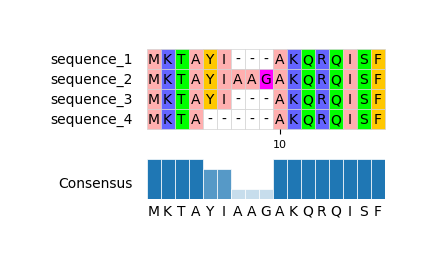

In [14]:
# Create visualization
mv = plot_msa(
    aa_sequenes,
    seq_ids=sequence_ids,
    title="Protein Sequence Alignment",
    wrap_length=250,
    show_grid=True,
    show_consensus=True,
)

# Display the plot properly (semicolon suppresses output)
mv.plotfig();